<a href="https://colab.research.google.com/github/idiocter/Concept-of-AI/blob/workshop2/Workshop2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 3.1 Warming Up Exercises - Basic Inspection and Exploration:

# Problem 1 - Data Read, Write and Inspect:

# Complete all following Task:
# • Dataset for the Task: "bank.csv"
# 1. Load the provided dataset and import in pandas DataFrame.
# Task 1: Upload and Load bank.csv

import pandas as pd
from google.colab import files

print("Upload bank.csv")
uploaded = files.upload()

# Loading the CSV into a DataFrame
bank_df = pd.read_csv("bank.csv")

bank_df.head()


# 2. Check info of the DataFrame and identify following:
# (a) columns with dtypes=object
# (b) unique values of those columns.
# (c) check for the total number of null values in each column.


# Identifying columns with dtype object
object_cols = bank_df.select_dtypes(include="object").columns
print("Columns with dtype = object:")
print(object_cols)

# Unique values for each object-type column
print("\nUnique values for each object column:")
for col in object_cols:
    print(f"\nColumn: {col}")
    print(bank_df[col].unique())

# Counting null values in each column
print("\nNull values in each column:")
print(bank_df.isnull().sum())


# 3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in ”.csv” with name ”banknumericdata.csv”

# Creating new DataFrame with numeric columns only
bank_numeric = bank_df.drop(columns=object_cols)

# Save numeric-only dataset as CSV
bank_numeric.to_csv("banknumericdata.csv", index=False)

print("banknumericdata.csv created successfully.")
bank_numeric.head()


# 4. Read ”banknumericdata.csv” and Find the summary statistics.

df_numeric = pd.read_csv("banknumericdata.csv")

# Summary statistics
df_numeric.describe()

Upload bank.csv


Saving bank.csv to bank.csv
Columns with dtype = object:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

Unique values for each object column:

Column: job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Column: marital
['married' 'single' 'divorced']

Column: education
['tertiary' 'secondary' 'unknown' 'primary']

Column: default
['no' 'yes']

Column: housing
['yes' 'no']

Column: loan
['no' 'yes']

Column: contact
['unknown' 'cellular' 'telephone']

Column: month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Column: poutcome
['unknown' 'failure' 'other' 'success']

Column: y
['no' 'yes']

Null values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
mont

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
# Problem 2 - Data Imputations:
# Complete all the following Task:
# • Dataset for the Task: "medical_student.csv"

# 1. Load the provided dataset and import in pandas DataFrame.

print("Upload medical_student.csv")
uploaded = files.upload()

medical_df = pd.read_csv("medical_students_dataset.csv")

medical_df.head()

# 2. Check info of the DataFrame and identify column with missing (null) values.

# Showing column names, dtypes, and non-null counts
medical_df.info()

print("\nMissing value count per column:")
print(medical_df.isnull().sum())

# 3. For the column with missing values fill the values using various techniques we discussed above. Try to explain why did you select the particular methods for particular column.
medical_df["Student ID"] = medical_df["Student ID"].ffill()

numeric_mean_cols = [
    "Age", "Height", "Weight", "BMI",
    "Temperature", "Heart Rate",
    "Blood Pressure"
]

for col in numeric_mean_cols:
    medical_df[col] = medical_df[col].fillna(medical_df[col].mean())

medical_df["Cholesterol"] = medical_df["Cholesterol"].fillna(medical_df["Cholesterol"].median())

categorical_cols = ["Gender", "Blood Type", "Diabetes", "Smoking"]

for col in categorical_cols:
    medical_df[col] = medical_df[col].fillna(medical_df[col].mode()[0])

print("\nMissing values AFTER imputation:\n")
print(medical_df.isnull().sum())

# 4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
# {Hint: dataset.duplicated.sum()}

print("Number of duplicate rows:", medical_df.duplicated().sum())

# Droping duplicate rows
medical_df = medical_df.drop_duplicates()

medical_df.shape

Upload medical_student.csv


Saving medical_students_dataset.csv to medical_students_dataset.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB

Missing value count per column:
Student ID        20000
Age               200

(187444, 13)

In [ ]:
import pandas as pd

# Problem - 1:
# Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’. Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean, median, maximum value, and minimum value of the ’Fare’ column?

print("Upload Titanic-Dataset.csv")
uploaded = files.upload()
df = pd.read_csv("Titanic-Dataset.csv")

df.head()

# Subset only the required columns
subset_cols = ["Name", "Pclass", "Sex", "Age", "Fare", "Survived", "Embarked"] # Added 'Embarked' here
df = df[subset_cols]

# Keeping only first-class passengers
df = df[df["Pclass"] == 1]

# Computing required stats
print("Fare Mean:", df["Fare"].mean())
print("Fare Median:", df["Fare"].median())
print("Fare Max:", df["Fare"].max())
print("Fare Min:", df["Fare"].min())

Upload Titanic-Dataset.csv


Saving Titanic-Dataset.csv to Titanic-Dataset (6).csv
Fare Mean: 84.1546875
Fare Median: 60.287499999999994
Fare Max: 512.3292
Fare Min: 0.0


In [ ]:
# Problem 2:
# How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found # this out, drop them from your DataFrame.

print("Null Age values:", df["Age"].isnull().sum())

# Drops rows where Age is null
df = df.dropna(subset=["Age"])

df.head()




Null Age values: 30


,Name,Pclass,Sex,Age,Fare,Survived,Embarked
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1,C
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1,S
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0,S
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1,S
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1,S


In [ ]:
# Probelm 3:

'''
Problem - 3:

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:

• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton
Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.
'''


# 1. One-hot encoding for 'Embarked'
embarked_dummies = pd.get_dummies(df["Embarked"], prefix="Embarked")

# 2. Add new columns to the original DataFrame
titanic_encoded = pd.concat([df, embarked_dummies], axis=1)

# 3. Drop the original 'Embarked' column
titanic_encoded = titanic_encoded.drop(columns=["Embarked"])

# 4. Print first few rows to verify
titanic_encoded.head()


,Name,Pclass,Sex,Age,Fare,Survived,Embarked_C,Embarked_Q,Embarked_S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1,True,False,False
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1,False,False,True
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0,False,False,True
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1,False,False,True
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1,False,False,True


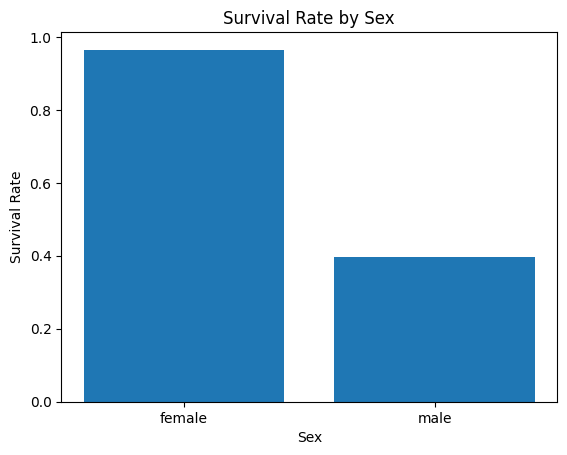

In [ ]:
# Problem - 4:

'''
Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a
visualization to show how the survival distributions vary by gender.

'''
import matplotlib.pyplot as plt

# Calculating survival rates by gender
survival_by_sex = df.groupby("Sex")["Survived"].mean()
survival_by_sex


plt.bar(survival_by_sex.index, survival_by_sex.values)
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Sex")
plt.show()

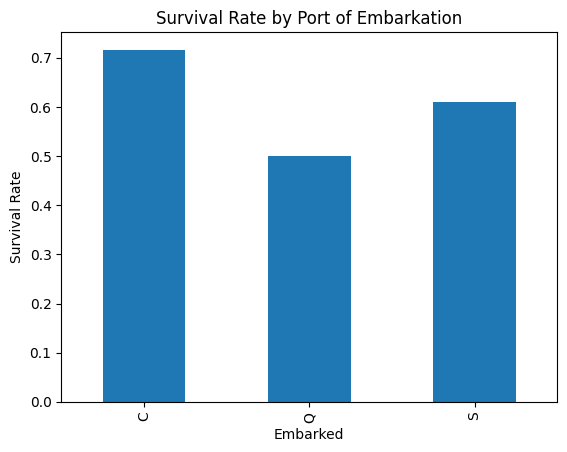

In [ ]:
# Problem 5:

'''
  Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Embarked’).
  In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).
'''

survival_by_port = df.groupby("Embarked")["Survived"].mean()
survival_by_port

# Ploting survival rate by port
survival_by_port.plot(kind="bar")
plt.title("Survival Rate by Port of Embarkation")
plt.ylabel("Survival Rate")
plt.show()




Survival Rate by Age Group and Pclass:
 AgeGroupLabel  Pclass
0-24           1         0.794872
24-35          1         0.767442
35-42          1         0.696970
42-51          1         0.542857
51-80          1         0.444444
Name: Survived, dtype: float64


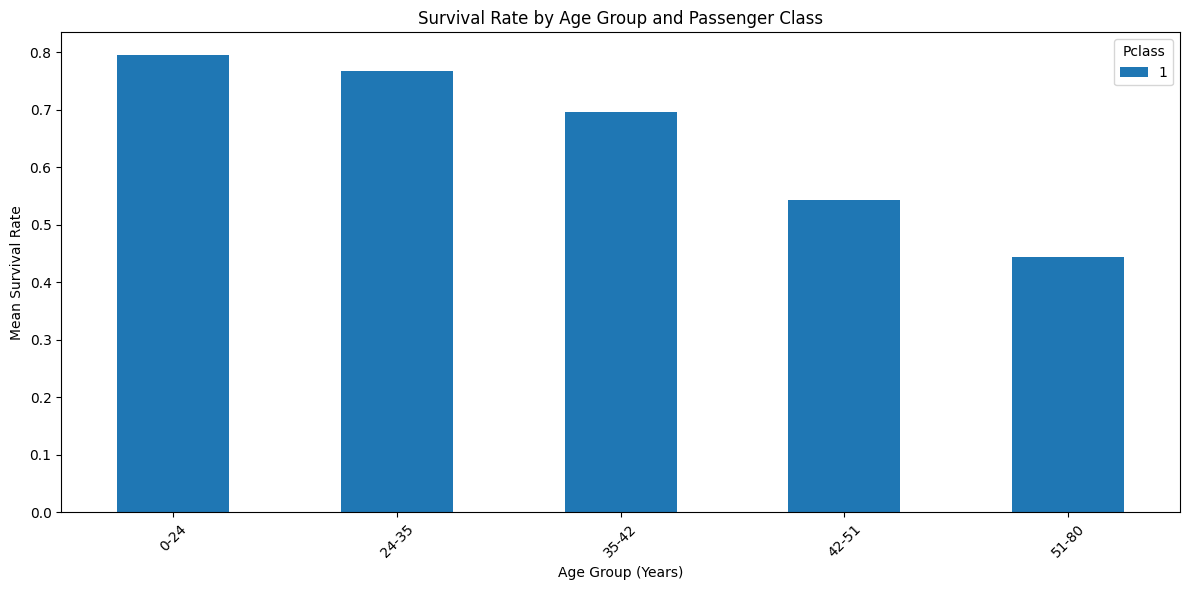

In [ ]:
# Problem - 6{Optional}
'''Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
and age group. Draw a visualization using a any plotting library to represent this graphically.

'''

# Drop rows with missing Age
df_age = df.dropna(subset=["Age"])

# Create 5 quantile-based age groups (continuous intervals)
df_age["AgeGroup"] = pd.qcut(df_age["Age"], 5)

# Convert AgeGroup intervals to strings showing whole numbers
df_age["AgeGroupLabel"] = df_age["AgeGroup"].apply(lambda x: f"{int(x.left)}-{int(x.right)}")

# Group by AgeGroupLabel and Pclass
survival_by_age_pclass = df_age.groupby(["AgeGroupLabel", "Pclass"], observed=True)["Survived"].mean()
print("\nSurvival Rate by Age Group and Pclass:\n", survival_by_age_pclass)

# Plotting as grouped bar chart
survival_by_age_pclass.unstack().plot(kind="bar", figsize=(12,6))
plt.title("Survival Rate by Age Group and Passenger Class")
plt.ylabel("Mean Survival Rate")
plt.xlabel("Age Group (Years)")
plt.xticks(rotation=45)
plt.legend(title="Pclass")
plt.tight_layout()
plt.show()
